# Get the data

Data provided at "https://app.box.com/s/ji910ez3ycw137rw07xnhielxey7ww41"

In [1]:
import os
import pandas as pd

base_path = os.getcwd()
raw_data_path = os.path.join(base_path, '../data_raw/StudentsPerformance.csv')
clean_data_path = os.path.join(base_path, '../data_clean/data_cleaned.csv')

raw_data = pd.read_csv(raw_data_path)
raw_data.head()

C:\Users\rgbmr\AppData\Local\Temp\ipykernel_4320\3367656454.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Prepare data for visualization

Categorical variables are object dtype

In [2]:
raw_data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Encoding to view distributions

In [3]:
data_mapped = raw_data.copy()
mapping_data = []

for col in raw_data.columns:
    if (raw_data[col].dtype == 'object'):
        # map the unique values to integers from 0 to n
        unique_values = raw_data[col].unique()
        mapping = dict(zip(unique_values, range(len(unique_values))))
        data_mapped[col] = data_mapped[col].replace(mapping)
        mapping_data.append({ col : mapping })

data_mapped.head()

C:\Users\rgbmr\AppData\Local\Temp\ipykernel_4320\200552086.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_mapped[col] = data_mapped[col].replace(mapping)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,0,0,0,0,72,72,74
1,0,1,1,0,1,69,90,88
2,0,0,2,0,0,90,95,93
3,1,2,3,1,0,47,57,44
4,1,1,1,0,0,76,78,75


In [4]:
mapping_data

[{'gender': {'female': 0, 'male': 1}},
 {'race/ethnicity': {'group B': 0,
   'group C': 1,
   'group A': 2,
   'group D': 3,
   'group E': 4}},
 {'parental level of education': {"bachelor's degree": 0,
   'some college': 1,
   "master's degree": 2,
   "associate's degree": 3,
   'high school': 4,
   'some high school': 5}},
 {'lunch': {'standard': 0, 'free/reduced': 1}},
 {'test preparation course': {'none': 0, 'completed': 1}}]

Check for missing values

In [5]:
data_mapped.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [26]:
data_mapped.to_csv(clean_data_path, index=False)

# Make visualizations

Using histograms such as these, we can easily view the distributions of data. I plotted the numerical and categorical variables separately to include the category names and distinguish with color

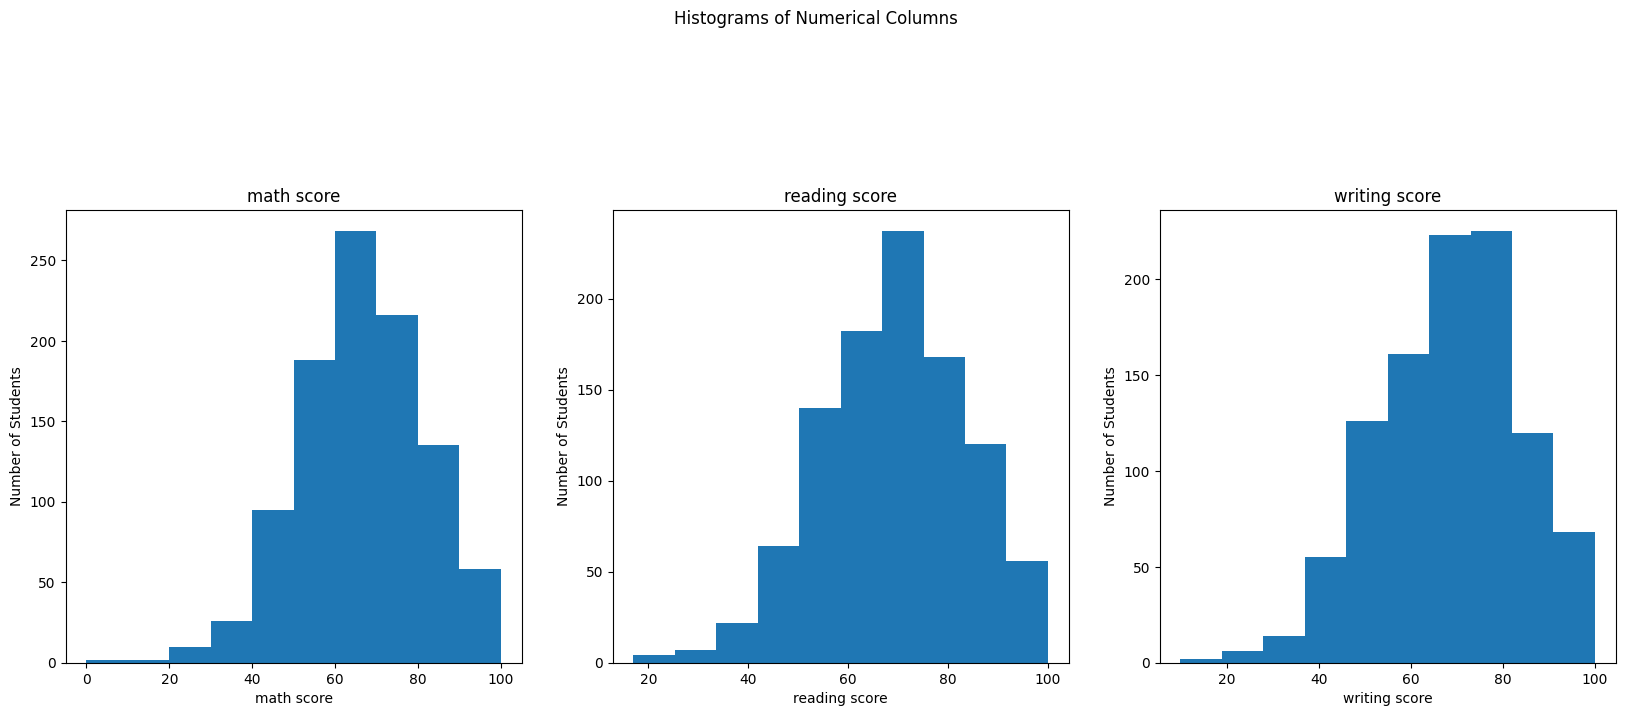

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.suptitle('Histograms of Numerical Columns')
for i, col in enumerate(raw_data.select_dtypes(include=['int64']).columns):
    plt.subplot(3, 3, i + 1)
    raw_data[col].plot(kind='hist', title=col)
    plt.xlabel(col)
    plt.ylabel('Number of Students')

# replace x axis labels with column names
hist_path = os.path.join(base_path, '../results/numerical_data_hist.png')
plt.savefig(hist_path)

In [7]:
# had to rename the column to avoid issues with the '/' character
data_mapped.rename(columns={'race/ethnicity': 'race_ethnicity'}, inplace=True)

for mapping in mapping_data:
    for key in mapping:
        if key == 'race/ethnicity':
            mapping['race_ethnicity'] = mapping[key]
            del mapping[key]
            break

mapping_data

[{'gender': {'female': 0, 'male': 1}},
 {'race_ethnicity': {'group B': 0,
   'group C': 1,
   'group A': 2,
   'group D': 3,
   'group E': 4}},
 {'parental level of education': {"bachelor's degree": 0,
   'some college': 1,
   "master's degree": 2,
   "associate's degree": 3,
   'high school': 4,
   'some high school': 5}},
 {'lunch': {'standard': 0, 'free/reduced': 1}},
 {'test preparation course': {'none': 0, 'completed': 1}}]

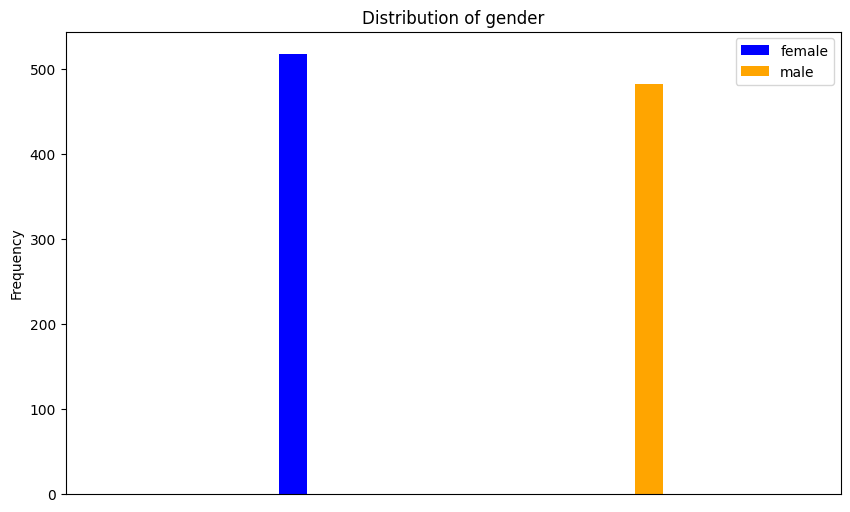

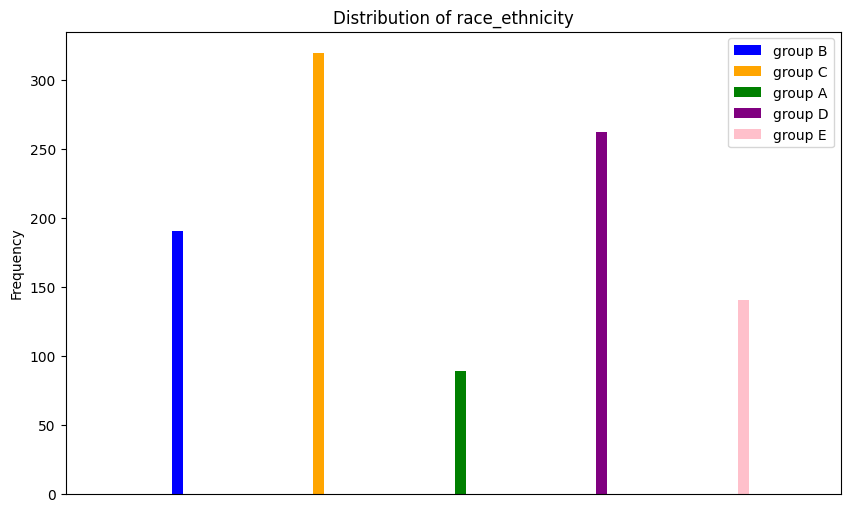

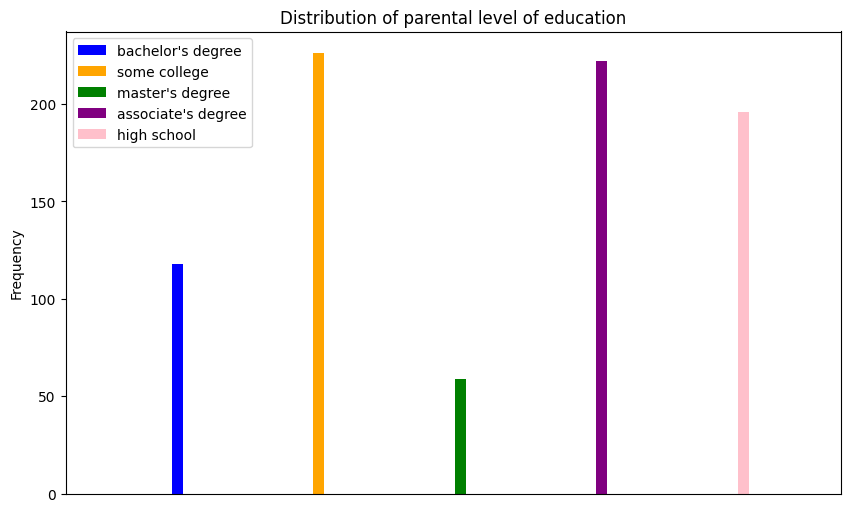

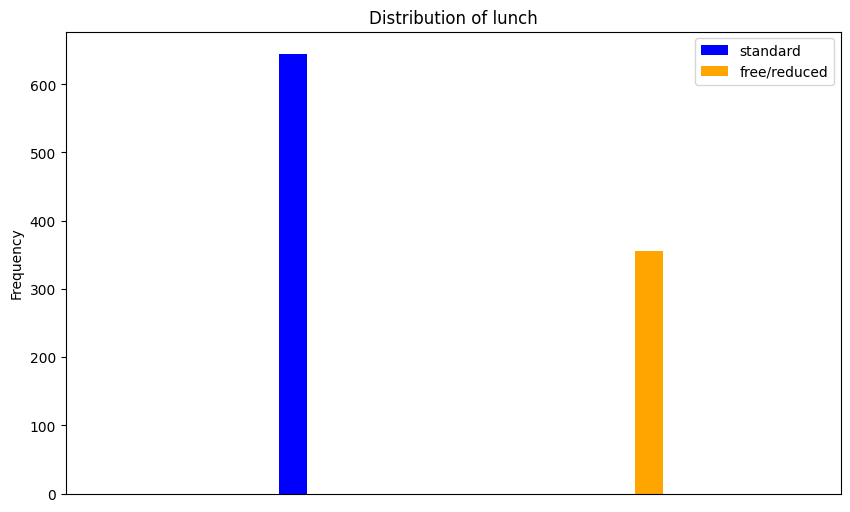

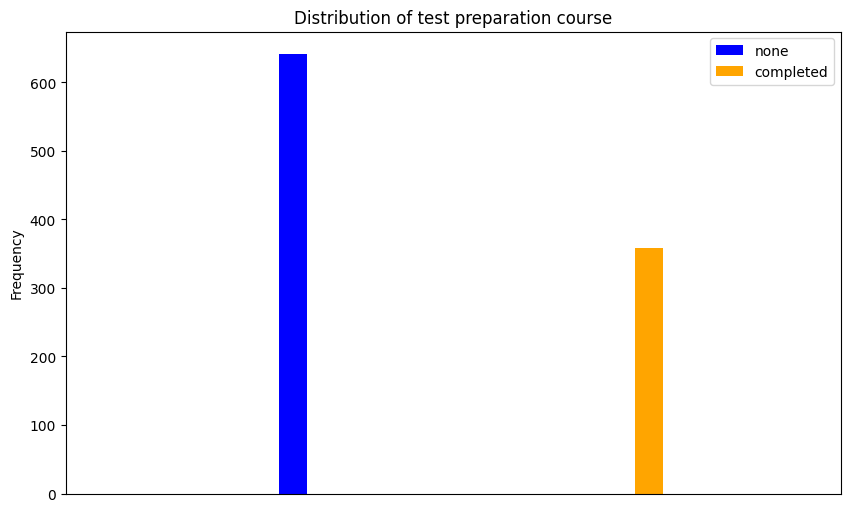

In [15]:
colors = ['blue', 'orange', 'green', 'purple', 'pink']
for data in mapping_data:
    for key, value in data.items():
        plt.figure(figsize=(10, 6))
        for (category, index), color in zip(value.items(), colors[:len(value)]):
            # Create a histogram for each category
            plt.hist(data_mapped[data_mapped[key] == index][key], label=category, color=color, bins=10, rwidth=0.8)

        plt.xticks([]) # Remove x-axis labels
        plt.legend() # Show legend to differentiate categories
        plt.title(f'Distribution of {key}')
        plt.ylabel('Frequency')
        plt.savefig(f'../results/{key}_dist.png')

Using a scatterplot, we can more easily see potential correlation in the data. As we might expect, scores between categories are very correlated. Since this is a scatterplot matrix, we can see a density curve on the diagonal as well which gives even more insight into distribution.

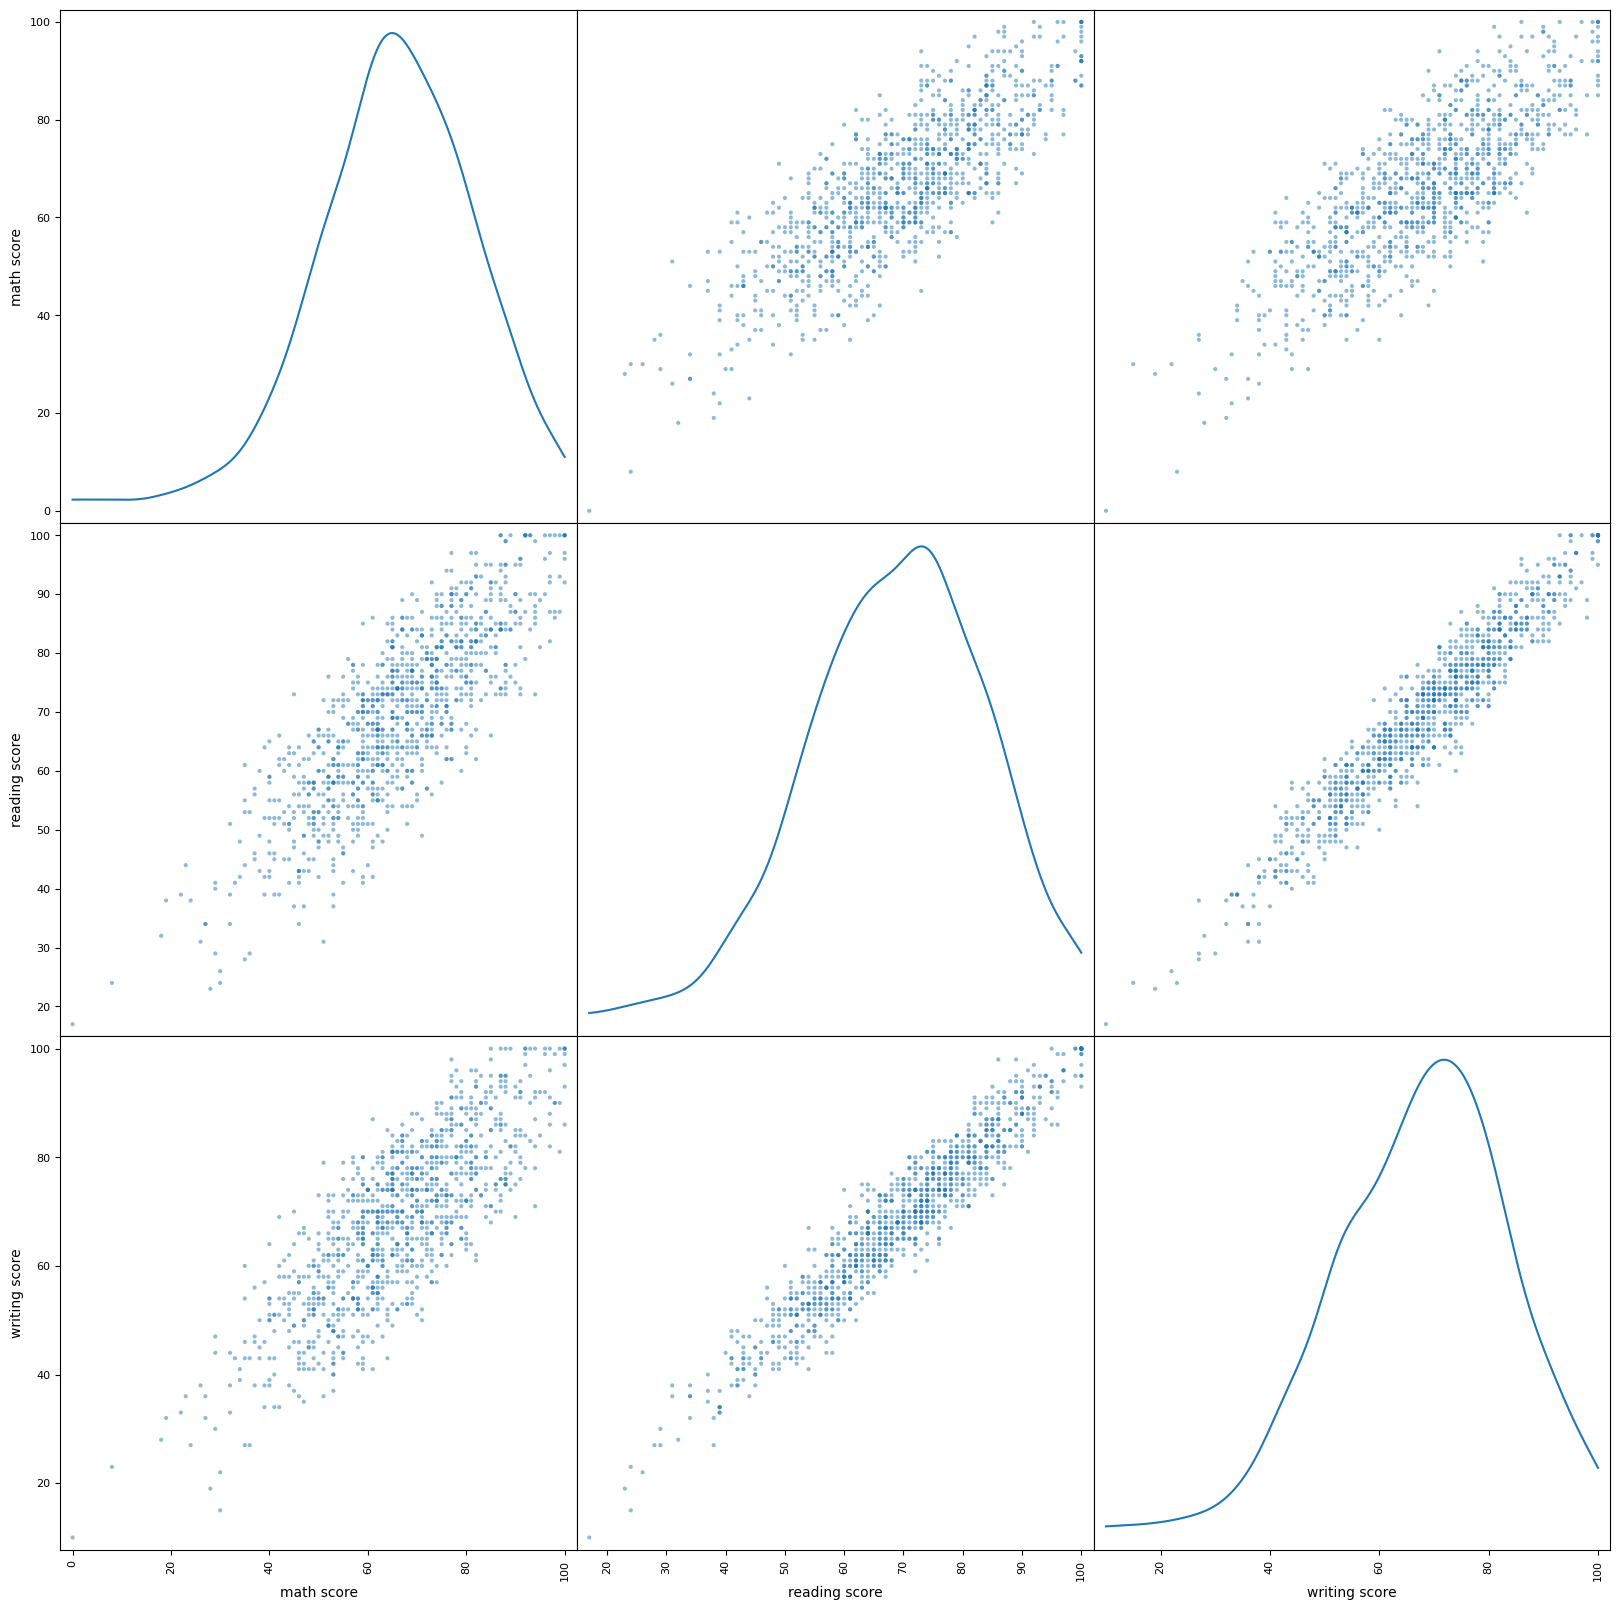

In [17]:
pd.plotting.scatter_matrix(raw_data, figsize=(20, 20), diagonal='kde')
plt.savefig('../results/numerical_scatter_matrix.png')

Using box and whisker plots, we are now able to see the distribution of the categorical variables with respect to their different scores. This could give us clues to potential biases or relationships that are present.

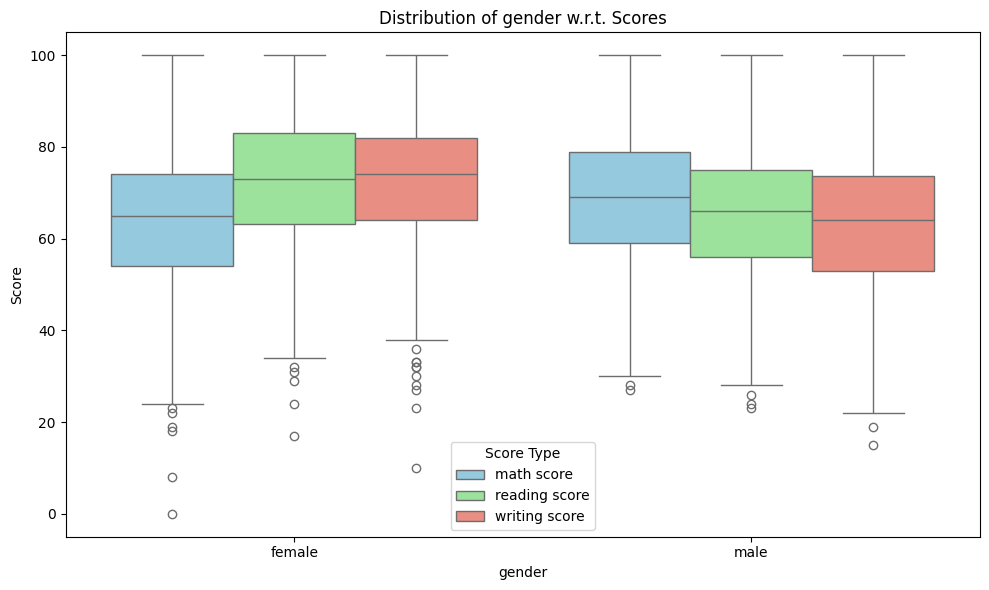

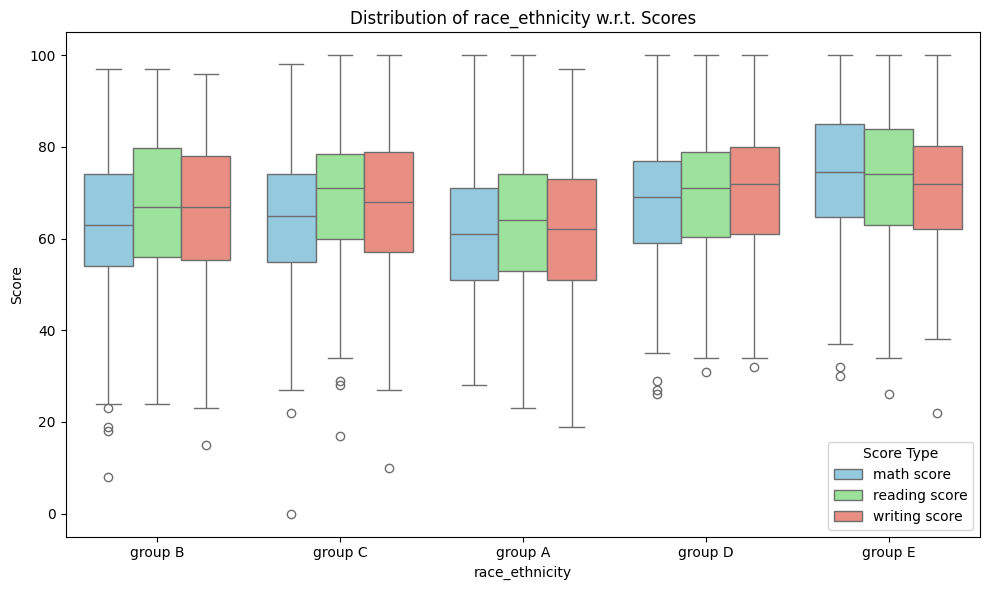

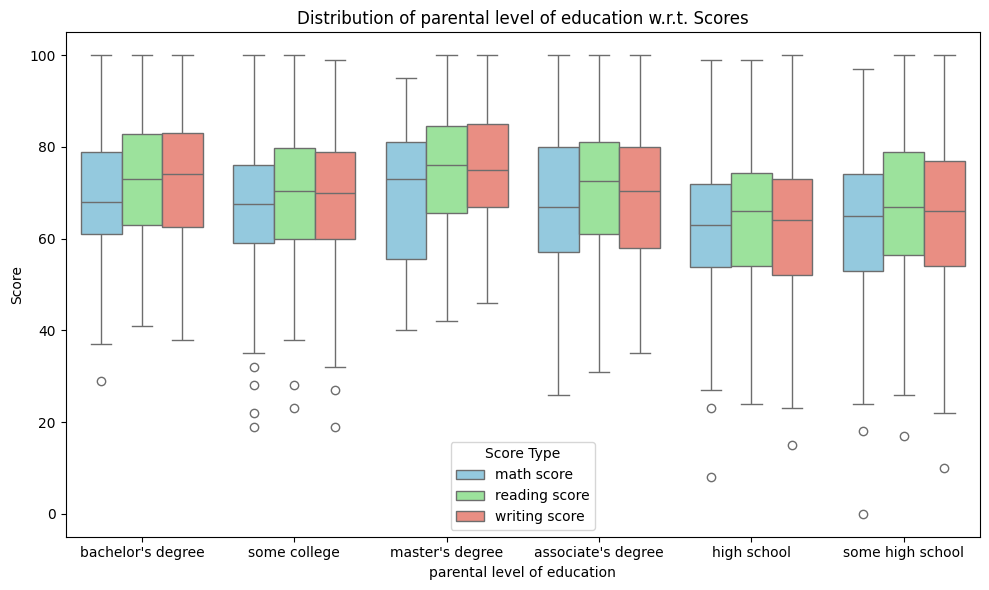

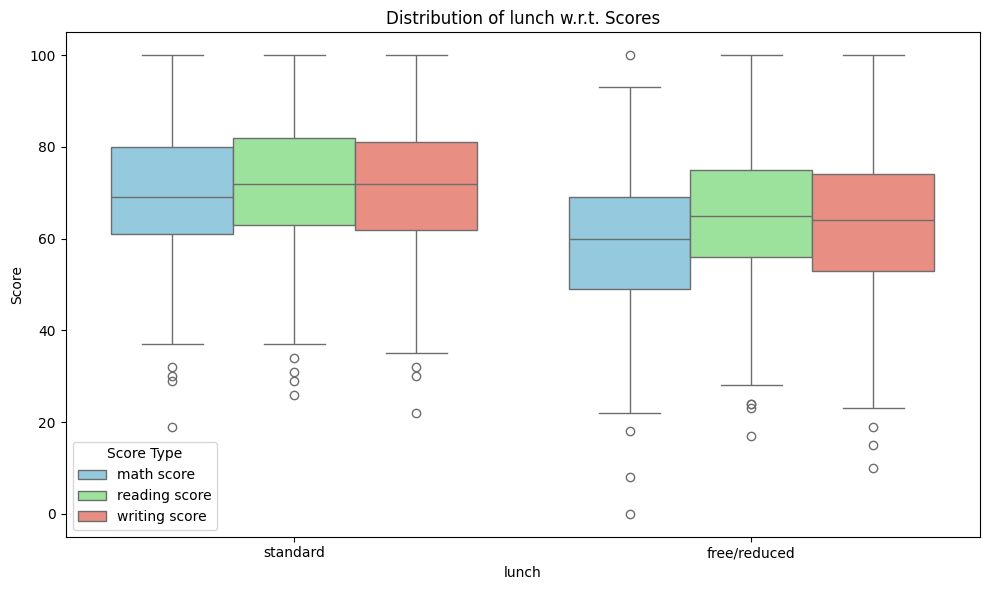

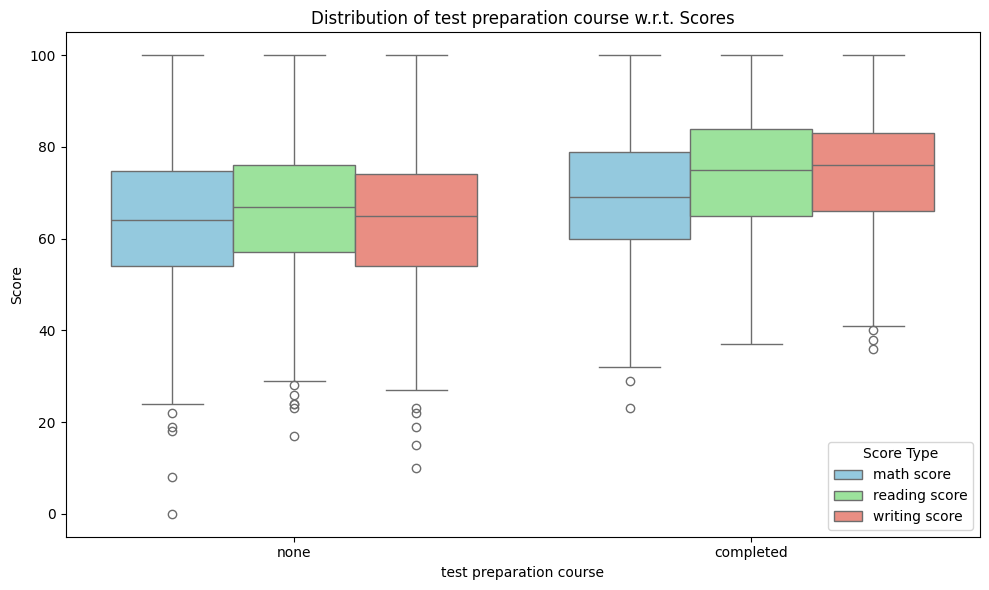

In [21]:
import seaborn as sns
# Set up color palette for the score types
color_palette = {'math score': 'skyblue', 'reading score': 'lightgreen', 'writing score': 'salmon'}
score_vars = ['math score', 'reading score', 'writing score']
categorical_vars = data_mapped.drop(score_vars, axis=1).columns
# using raw data again to keep class labels
data_for_boxplot = raw_data.copy()
data_for_boxplot.rename(columns={'race/ethnicity': 'race_ethnicity'}, inplace=True)

# Loop through each categorical variable to create a separate plot
for cat_var in categorical_vars:
    plt.figure(figsize=(10, 6))
    # Melting the dataframe to long format for easy plotting with seaborn
    df_melted = pd.melt(data_for_boxplot, id_vars=[cat_var], value_vars=score_vars, var_name='Score Type', value_name='Score')
    sns.boxplot(x=cat_var, y='Score', hue='Score Type', data=df_melted, palette=color_palette)
    plt.title(f'Distribution of {cat_var} w.r.t. Scores')
    plt.legend(title='Score Type')
    plt.tight_layout()
    plt.savefig(f'../results/{cat_var}_boxplot.png')

Using violin plots gives an even more nuanced view to the spread of data, relative to boxplots.

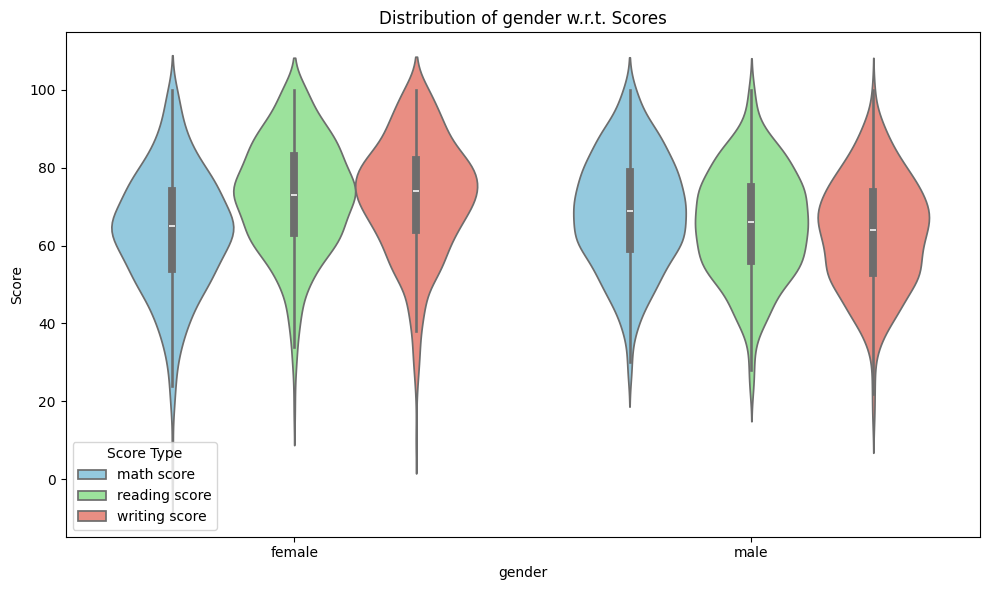

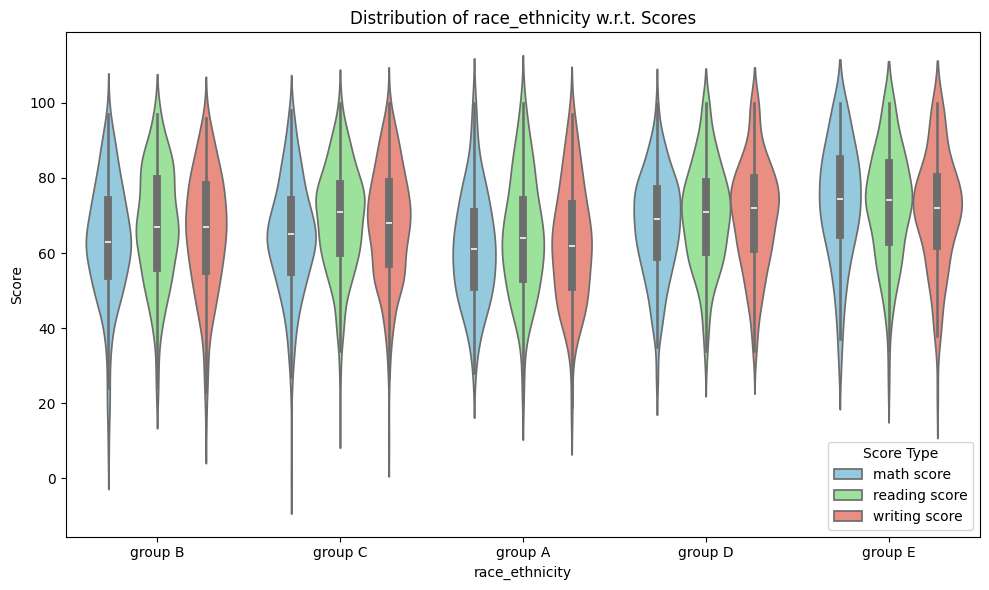

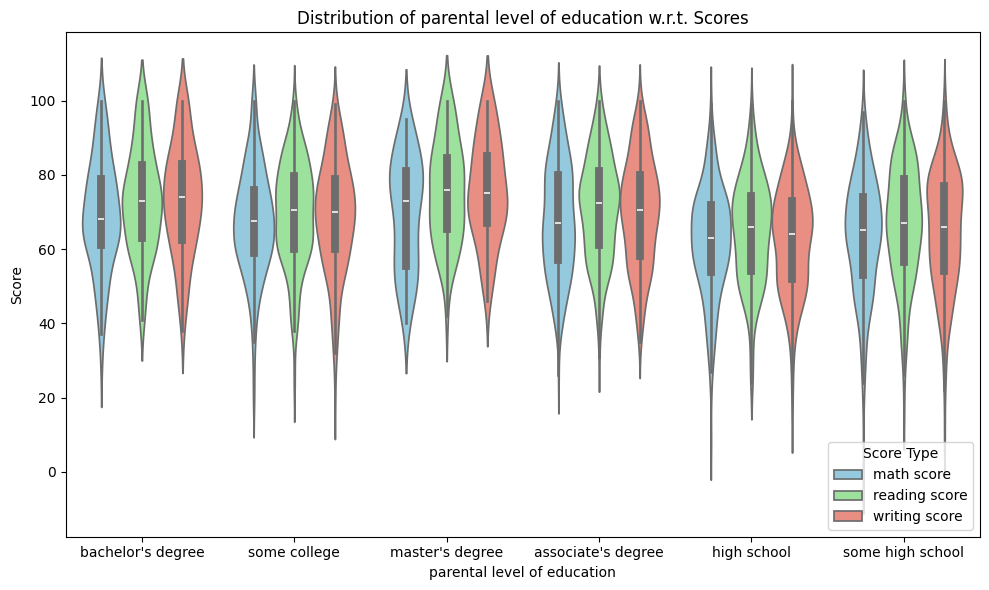

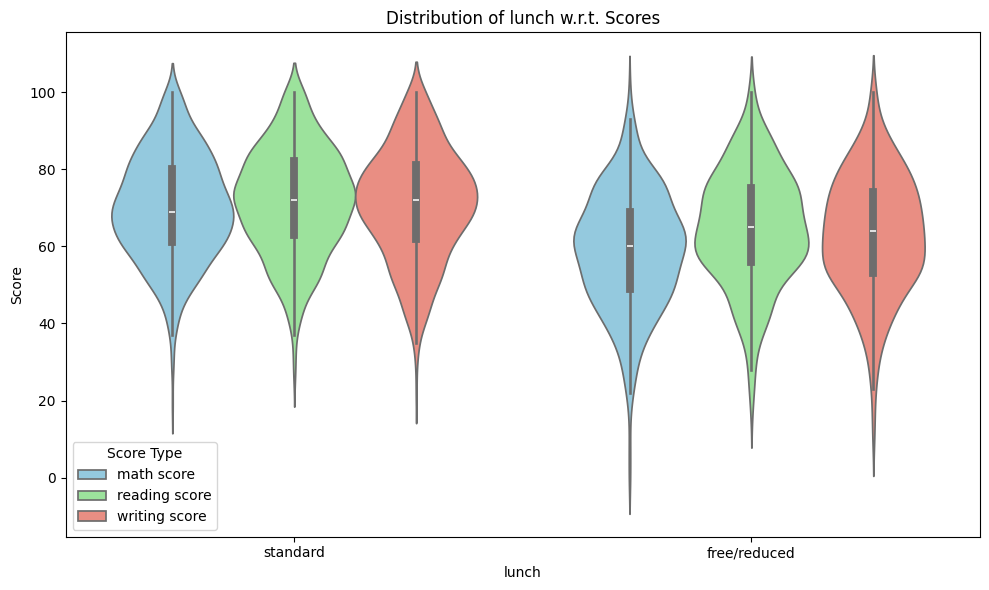

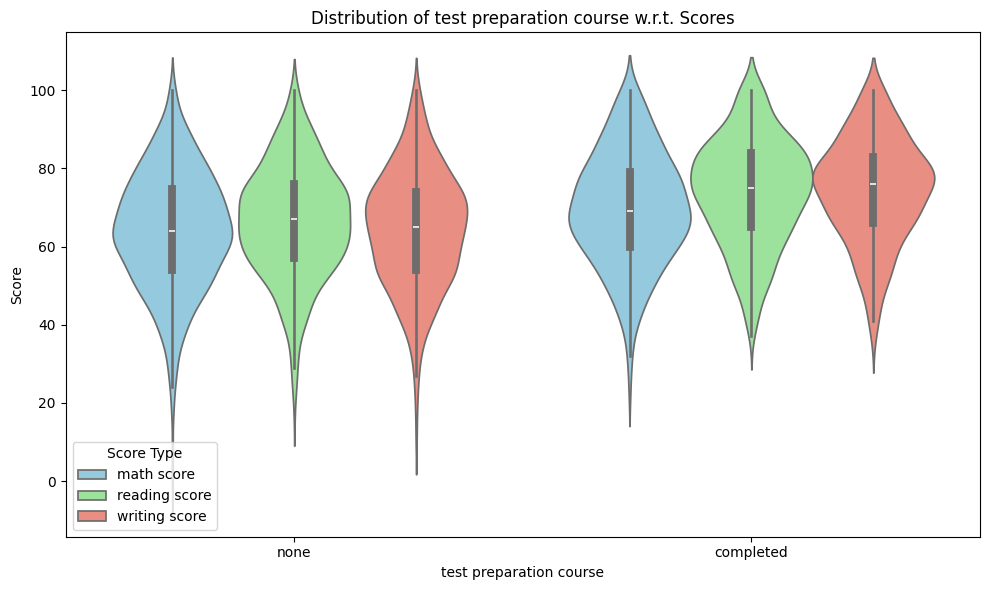

In [20]:
# Loop through each categorical variable to create a separate plot
for cat_var in categorical_vars:
    plt.figure(figsize=(10, 6))
    df_melted = pd.melt(data_for_boxplot, id_vars=[cat_var], value_vars=score_vars, var_name='Score Type', value_name='Score')
    sns.violinplot(x=cat_var, y='Score', hue='Score Type', data=df_melted, palette=color_palette)
    plt.title(f'Distribution of {cat_var} w.r.t. Scores')
    plt.legend(title='Score Type')
    plt.tight_layout()
    plt.savefig(f'../results/{cat_var}_violin.png')